In [ ]:
!pip install tensorflow_datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install tensorflow_datasets

import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds


In [ ]:
base_dir ='/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'validation', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.100.jpg', 'cat.0.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.107.jpg', 'dog.108.jpg', 'dog.109.jpg', 'dog.11.jpg', 'dog.110.jpg', 'dog.111.jpg', 'dog.112.jpg', 'dog.113.jpg', 'dog.114.jpg', 'dog.115.jpg']
total training cat images : 1000
total training dog images : 1010
total validation cat images : 160
total validation dog images : 500


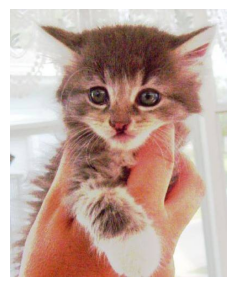

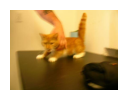

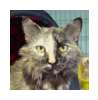

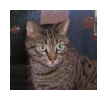

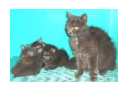

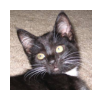

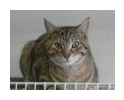

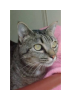

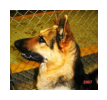

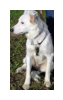

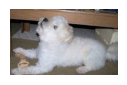

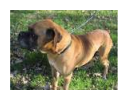

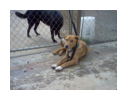

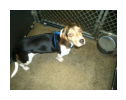

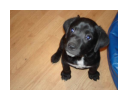

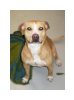

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)

for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  # Only 1 output neuron.
  # It will contain a value from 0-1 where 0 for 1 class ('cats')
  # and 1 for the other ('dogs')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Bài tập 2

In [ ]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():


    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(2, activation='softmax')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

    return model



In [ ]:
model = gen_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,495,074 (36.22 MB)

 Trainable params: 9,495,074 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

    import matplotlib.pyplot as plt


    #training data
    train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train',  # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical',subset = 'training')
    #get a 300-pic dataset from generator
    train_dataset = tf.data.Dataset.from_generator(
      lambda: train_generator,
      output_types=(tf.float32, tf.float32),
      output_shapes=([None, 150, 150, 3], [None, 2])
      ).take(20)
    epochs = 10
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
      '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation',
      target_size=(150, 150),
      batch_size=15,
      class_mode='categorical',
      subset='validation')
     # set as validation data
    validation_dataset = tf.data.Dataset.from_generator(
        lambda: validation_generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, 150, 150, 3], [None, 2])
      ).take(6)


    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit(
      train_dataset,
      steps_per_epoch=150,
      epochs=epochs,
      validation_data = validation_dataset,
      validation_steps = 50,
      verbose=1)



    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 1508 images belonging to 2 classes.
Found 165 images belonging to 2 classes.
Epoch 1/10
 20/150 ━━━━━━━━━━━━━━━━━━━━ 7:32 3s/step - acc: 0.4995 - loss: 2.0082

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 98s 610ms/step - acc: 0.5202 - loss: 1.3588 - val_acc: 0.6556 - val_loss: 0.6889
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 110s 406ms/step - acc: 0.5019 - loss: 0.6943 - val_acc: 0.5556 - val_loss: 0.6920
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - acc: 0.4846 - loss: 0.6941 - val_acc: 0.3000 - val_loss: 0.7006
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 305ms/step - acc: 0.5474 - loss: 0.6922 - val_acc: 0.7333 - val_loss: 0.6821
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - acc: 0.5180 - loss: 0.6893 - val_acc: 0.2889 - val_loss: 0.6994
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - acc: 0.5276 - loss: 0.6915 - val_acc: 0.2556 - val_loss: 0.7050
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - acc: 0.5105 - loss: 0.6913 - val_acc: 0.2556 - val_loss: 0.7017
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - acc: 0.5743 - loss: 0.6795 - val_acc: 0.3556 - val_loss: 0.7447
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 8

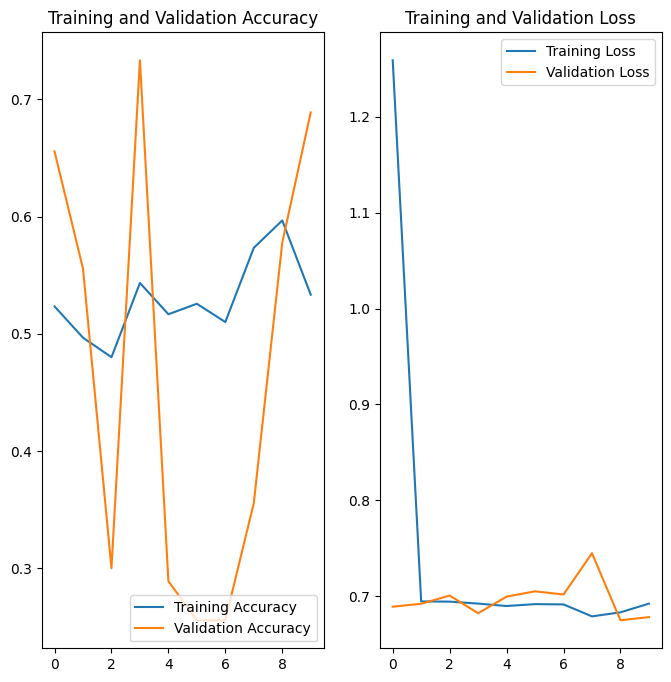

Training Accuracy:
0.5333333611488342
Testing Accuracy:
0.6888889074325562


In [ ]:
train_test_animals()